In [39]:
# Step0: Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Step1: Load the data

# Step1.1: Read the “housing.xlsx” file
housingData =pd.read_excel (r'housing.xlsx')

In [41]:
# Step1.2: Print first few rows of this data
housingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [46]:
# Step1.3: Extract input (X) and output (y) data from the datase

X = housingData.iloc[:, :-1].values
y = housingData.iloc[:, [-1]].values

In [47]:
# Step2: Handle missing values: 
# Fill the missing values with the mean of the respective column

from sklearn.impute import SimpleImputer
missingValueImputer  = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, :-1] = missingValueImputer.fit_transform(X[:, :-1])
y = missingValueImputer.fit_transform(y)

In [48]:
# Step3: Encode categorical data: 
# Convert categorical column in the dataset to numerical data

from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X[:, -1] = X_labelencoder.fit_transform(X[:, -1])

In [49]:
# Step4: Split the dataset: Split the data into 
# 80% training dataset and 20% test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
# Step5: Standardize data: Standardize training and test datasets

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [27]:
# Task6.1: Perform Linear Regression on training data

from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# Task6.2: Predict output for test dataset using the fitted model

predictionLinear = linearRegression.predict(X_test)

In [29]:
# Task6.3: Print root mean squared error (RMSE) from Linear Regression

from sklearn.metrics import mean_squared_error
mseLinear = mean_squared_error(y_test, predictionLinear)
print('Root mean squared error (RMSE) from Linear Regression : ')
print(mseLinear)

Root mean squared error (RMSE) from Linear Regression : 
0.3643080104280694


In [30]:
# Task7.1: Extract just the median_income column from the 
# independent variables (from X_train and X_test)

X_train_median_income = X_train[: , [7]]
X_test_median_income = X_test[: , [7]]

In [31]:
# Task7.2: Perform Linear Regression to predict housing values 
# based on median_income

from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_median_income, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# Task7.3: Predict output for test dataset using the fitted model

predictionLinear2 = linearRegression2.predict(X_test_median_income)

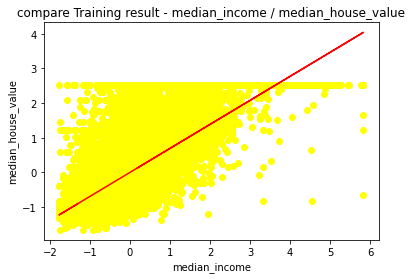

In [36]:
# Task7.4: Plot the fitted model for training data as well as 
# for test data to check if the fitted model satisfies the test data

# Task7.4.1: let us visualize the Training set
plt.scatter(X_train_median_income, y_train, color = 'yellow')
plt.plot (X_train_median_income,linearRegression2.predict(X_train_median_income), color = 'red')
plt.title ('compare Training result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

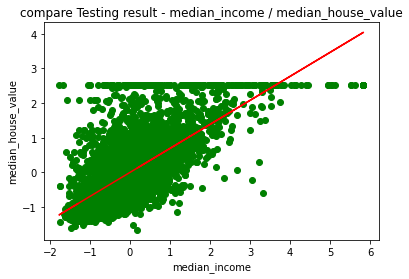

In [38]:
# Task7.4.2: let us visualize the Testing set

plt.scatter(X_test_median_income, y_test, color = 'green')
plt.plot (X_train_median_income, linearRegression2.predict(X_train_median_income), color = 'red')
plt.title ('compare Testing result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()